In [2]:
import pandas as pd
import random
import numpy as np

# 1. Simple Functions

# Installing pyspark

In [1]:
!pip install pyspark

     |████████████████████████████████| 281.4 MB 28 kB/s 
     |████████████████████████████████| 198 kB 53.4 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=779387e62c3f5ab30a9c72ce9bdd9214bf7d54a8557706e98bdb82af3319e027
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


# Creating Spark Session

In [3]:
from pyspark.sql import SparkSession

In [4]:
spark=SparkSession.builder.appName('Dataframe').getOrCreate()

In [5]:
spark

## Read Data

In [6]:
cases = spark.read.load("data/Case.csv",format="csv", sep=",", inferSchema="true", header="true")

## Show Data

In [7]:
cases.show()

+-------+--------+---------------+-----+--------------------+---------+---------+----------+
|case_id|province|           city|group|      infection_case|confirmed| latitude| longitude|
+-------+--------+---------------+-----+--------------------+---------+---------+----------+
|1000001|   Seoul|     Yongsan-gu| true|       Itaewon Clubs|       72|37.538621|126.992652|
|1000002|   Seoul|        Guro-gu| true| Guro-gu Call Center|       98|37.508163|126.884387|
|1000003|   Seoul|  Dongdaemun-gu| true|       Dongan Church|       20|37.592888|127.056766|
|1000004|   Seoul|        Guro-gu| true|Manmin Central Ch...|       41|37.481059|126.894343|
|1000005|   Seoul|   Eunpyeong-gu| true|Eunpyeong St. Mar...|       14| 37.63369|  126.9165|
|1000006|   Seoul|   Seongdong-gu| true|    Seongdong-gu APT|       13| 37.55713|  127.0403|
|1000007|   Seoul|      Jongno-gu| true|Jongno Community ...|       10| 37.57681|   127.006|
|1000008|   Seoul|        Jung-gu| true|Jung-gu Fashion C...|        7

limit() method limits the result count to the specified number.

toPandas() method Returns the contents of this DataFrame as Pandas pandas.DataFrame.

In [8]:
cases.limit(10).toPandas()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,72,37.538621,126.992652
1,1000002,Seoul,Guro-gu,True,Guro-gu Call Center,98,37.508163,126.884387
2,1000003,Seoul,Dongdaemun-gu,True,Dongan Church,20,37.592888,127.056766
3,1000004,Seoul,Guro-gu,True,Manmin Central Church,41,37.481059,126.894343
4,1000005,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
5,1000006,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403
6,1000007,Seoul,Jongno-gu,True,Jongno Community Center,10,37.57681,127.006
7,1000008,Seoul,Jung-gu,True,Jung-gu Fashion Company,7,37.562405,126.984377
8,1000009,Seoul,from other city,True,Shincheonji Church,8,-,-
9,1000010,Seoul,-,False,overseas inflow,321,-,-


## Change Column Names

withColumnRenamed(existing, new) Returns a new DataFrame by renaming an existing column. This is a no-op if schema doesn’t contain the given column name.

In [9]:
cases = cases.withColumnRenamed("infection_case","infection_source")

toDF(*cols) Returns a new DataFrame that with new specified column names

In [10]:
cases = cases.toDF(*['case_id', 'province', 'city', 'group', 'infection_case', 'confirmed',
       'latitude', 'longitude'])

## Select Columns

select(*cols) Projects a set of expressions and returns a new DataFrame.

In [11]:
cases = cases.select('province','city','infection_case','confirmed')

In [12]:
cases.show()

+--------+---------------+--------------------+---------+
|province|           city|      infection_case|confirmed|
+--------+---------------+--------------------+---------+
|   Seoul|     Yongsan-gu|       Itaewon Clubs|       72|
|   Seoul|        Guro-gu| Guro-gu Call Center|       98|
|   Seoul|  Dongdaemun-gu|       Dongan Church|       20|
|   Seoul|        Guro-gu|Manmin Central Ch...|       41|
|   Seoul|   Eunpyeong-gu|Eunpyeong St. Mar...|       14|
|   Seoul|   Seongdong-gu|    Seongdong-gu APT|       13|
|   Seoul|      Jongno-gu|Jongno Community ...|       10|
|   Seoul|        Jung-gu|Jung-gu Fashion C...|        7|
|   Seoul|from other city|  Shincheonji Church|        8|
|   Seoul|              -|     overseas inflow|      321|
|   Seoul|              -|contact with patient|       18|
|   Seoul|              -|                 etc|       24|
|   Busan|     Dongnae-gu|       Onchun Church|       39|
|   Busan|from other city|  Shincheonji Church|       12|
|   Busan|    

## Sort

DataFrame.sort(*cols, **kwargs) Returns a new DataFrame sorted by the specified column(s).

In [13]:
cases.sort("confirmed").show()

+-----------------+---------------+--------------------+---------+
|         province|           city|      infection_case|confirmed|
+-----------------+---------------+--------------------+---------+
|          Jeju-do|              -|contact with patient|        0|
|       Gangwon-do|              -|contact with patient|        0|
|          Gwangju|              -|                 etc|        0|
|            Busan|from other city|Cheongdo Daenam H...|        1|
|          Gwangju|              -|contact with patient|        1|
|          Jeju-do|from other city|       Itaewon Clubs|        1|
|           Sejong|from other city|  Shincheonji Church|        1|
|           Sejong|              -|                 etc|        1|
|Chungcheongnam-do|              -|contact with patient|        1|
|     Jeollabuk-do|from other city|  Shincheonji Church|        1|
|     Jeollanam-do|from other city|  Shincheonji Church|        1|
|          Incheon|from other city|  Shincheonji Church|      

 pyspark.sql.functions.desc(col) Returns a sort expression based on the descending order of the given column name.

In [14]:
# descending Sort
from pyspark.sql import functions as F
cases.sort(F.desc("confirmed")).show()

+-----------------+---------------+--------------------+---------+
|         province|           city|      infection_case|confirmed|
+-----------------+---------------+--------------------+---------+
|            Daegu|         Nam-gu|  Shincheonji Church|     4510|
|            Daegu|              -|contact with patient|      929|
|            Daegu|              -|                 etc|      724|
| Gyeongsangbuk-do|from other city|  Shincheonji Church|      566|
|            Seoul|              -|     overseas inflow|      321|
|      Gyeonggi-do|              -|     overseas inflow|      225|
|            Daegu|   Dalseong-gun|Second Mi-Ju Hosp...|      196|
| Gyeongsangbuk-do|              -|contact with patient|      192|
| Gyeongsangbuk-do|              -|                 etc|      134|
|            Daegu|         Seo-gu|Hansarang Convale...|      128|
| Gyeongsangbuk-do|   Cheongdo-gun|Cheongdo Daenam H...|      120|
|Chungcheongnam-do|     Cheonan-si|gym facility in C...|      

## Type Casting

In [15]:
from pyspark.sql.types import IntegerType, StringType, DoubleType

In [16]:
cases = cases.withColumn('confirmed', F.col('confirmed').cast(IntegerType()))
cases = cases.withColumn('city', F.col('city').cast(StringType()))

## Filter

getting the  records where cases confirmed are more than 10 and province is Daegu

In [17]:
cases.filter((cases.confirmed>10) & (cases.province=='Daegu')).show()

+--------+------------+--------------------+---------+
|province|        city|      infection_case|confirmed|
+--------+------------+--------------------+---------+
|   Daegu|      Nam-gu|  Shincheonji Church|     4510|
|   Daegu|Dalseong-gun|Second Mi-Ju Hosp...|      196|
|   Daegu|      Seo-gu|Hansarang Convale...|      128|
|   Daegu|Dalseong-gun|Daesil Convalesce...|      100|
|   Daegu|     Dong-gu|     Fatima Hospital|       37|
|   Daegu|           -|     overseas inflow|       24|
|   Daegu|           -|contact with patient|      929|
|   Daegu|           -|                 etc|      724|
+--------+------------+--------------------+---------+



## GroupBy

group by province and city and then calculate two aggregates : one for sum and one for max on confirmed cases

In [18]:
from pyspark.sql import functions as F

cases.groupBy(["province","city"]).agg(F.sum("confirmed") ,F.max("confirmed")).show()

+----------------+---------------+--------------+--------------+
|        province|           city|sum(confirmed)|max(confirmed)|
+----------------+---------------+--------------+--------------+
|Gyeongsangnam-do|       Jinju-si|            10|            10|
|           Seoul|        Guro-gu|           139|            98|
|         Daejeon|              -|            27|            10|
|    Jeollabuk-do|from other city|             1|             1|
|Gyeongsangnam-do|Changnyeong-gun|             7|             7|
|           Seoul|              -|           363|           321|
|         Jeju-do|from other city|             1|             1|
|Gyeongsangbuk-do|              -|           336|           192|
|Gyeongsangnam-do|   Geochang-gun|            18|            10|
|         Incheon|from other city|            22|            20|
|           Busan|              -|            72|            29|
|           Daegu|         Seo-gu|           128|           128|
|           Busan|     Su

Column.alias(*alias, **kwargs) Returns this column aliased with a new name or names

Here grouping by province and city and calculating the same aggregates but with new names

In [19]:
cases.groupBy(["province","city"]).agg(F.sum("confirmed").alias("TotalConfirmed"),F.max("confirmed").alias("MaxFromOneConfirmedCase")).show()

+----------------+---------------+--------------+-----------------------+
|        province|           city|TotalConfirmed|MaxFromOneConfirmedCase|
+----------------+---------------+--------------+-----------------------+
|Gyeongsangnam-do|       Jinju-si|            10|                     10|
|           Seoul|        Guro-gu|           139|                     98|
|         Daejeon|              -|            27|                     10|
|    Jeollabuk-do|from other city|             1|                      1|
|Gyeongsangnam-do|Changnyeong-gun|             7|                      7|
|           Seoul|              -|           363|                    321|
|         Jeju-do|from other city|             1|                      1|
|Gyeongsangbuk-do|              -|           336|                    192|
|Gyeongsangnam-do|   Geochang-gun|            18|                     10|
|         Incheon|from other city|            22|                     20|
|           Busan|              -|    

In [20]:
cases.groupBy(["province","city"]).agg(
    F.sum("confirmed").alias("TotalConfirmed"),\
    F.max("confirmed").alias("MaxFromOneConfirmedCase")\
    ).show()

+----------------+---------------+--------------+-----------------------+
|        province|           city|TotalConfirmed|MaxFromOneConfirmedCase|
+----------------+---------------+--------------+-----------------------+
|Gyeongsangnam-do|       Jinju-si|            10|                     10|
|           Seoul|        Guro-gu|           139|                     98|
|         Daejeon|              -|            27|                     10|
|    Jeollabuk-do|from other city|             1|                      1|
|Gyeongsangnam-do|Changnyeong-gun|             7|                      7|
|           Seoul|              -|           363|                    321|
|         Jeju-do|from other city|             1|                      1|
|Gyeongsangbuk-do|              -|           336|                    192|
|Gyeongsangnam-do|   Geochang-gun|            18|                     10|
|         Incheon|from other city|            22|                     20|
|           Busan|              -|    

## Joins

In [21]:
#loading the Regions data

In [22]:
regions = spark.read.load("data/Region.csv",format="csv", sep=",", inferSchema="true", header="true")
regions.limit(10).toPandas()

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080
5,10050,Seoul,Gwanak-gu,37.478290,126.951502,22,33,1,0.89,15.12,4.9,909
6,10060,Seoul,Gwangjin-gu,37.538712,127.082366,22,33,3,1.16,13.75,4.8,723
7,10070,Seoul,Guro-gu,37.495632,126.887650,26,34,3,1.00,16.21,5.7,741
8,10080,Seoul,Geumcheon-gu,37.456852,126.895229,18,19,0,0.96,16.15,6.7,475
9,10090,Seoul,Nowon-gu,37.654259,127.056294,42,66,6,1.39,15.40,7.4,952


# DataFrame.join(right: pyspark.pandas.frame.DataFrame,

# on: Union[Any, Tuple[Any, …], 

# List[Union[Any, Tuple[Any, …]]], None] = None, 

# how: str = 'left', 

# lsuffix: str = '', 

# rsuffix: str = '') → pyspark.pandas.frame.DataFrame


Parameters

right: DataFrame, Series

on: str, list of str, or array-like, optional

Column or index level name(s) in the caller to join on the index in right, otherwise joins index-on-index. If multiple values 
given, the right DataFrame must have a MultiIndex. Can pass an array as the join key if it is not already contained in the calling DataFrame. Like an Excel VLOOKUP operation.

how: {‘left’, ‘right’, ‘outer’, ‘inner’}, default ‘left’
How to handle the operation of the two objects.


left: use left frame’s index (or column if on is specified).


right: use right’s index.


outer: form union of left frame’s index (or column if on is specified) with right’s index, and sort it. lexicographically.


inner: form intersection of left frame’s index (or column if on is specified) with right’s index, preserving the order of the left’s one.


lsuffixstr, default ‘’

Suffix to use from left frame’s overlapping columns.


rsuffixstr, default ‘’

Suffix to use from right frame’s overlapping columns.


Returns

DataFrame

A dataframe containing columns from both the left and right.

# applying left join on cases and regions  on the columns province and city

In [23]:
cases = cases.join(regions, ['province','city'],how='left')

In [24]:
cases.limit(10).toPandas()

,province,city,infection_case,confirmed,code,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,Seoul,Yongsan-gu,Itaewon Clubs,72,10210.0,37.532768,126.990021,15.0,13.0,1.0,0.68,16.87,6.5,435.0
1,Seoul,Guro-gu,Guro-gu Call Center,98,10070.0,37.495632,126.887650,26.0,34.0,3.0,1.00,16.21,5.7,741.0
2,Seoul,Dongdaemun-gu,Dongan Church,20,10110.0,37.574552,127.039721,21.0,31.0,4.0,1.06,17.26,6.7,832.0
3,Seoul,Guro-gu,Manmin Central Church,41,10070.0,37.495632,126.887650,26.0,34.0,3.0,1.00,16.21,5.7,741.0
4,Seoul,Eunpyeong-gu,Eunpyeong St. Mary's Hospital,14,10220.0,37.603481,126.929173,31.0,44.0,1.0,1.09,17.00,6.5,874.0
5,Seoul,Seongdong-gu,Seongdong-gu APT,13,10160.0,37.563277,127.036647,21.0,30.0,2.0,0.97,14.76,5.3,593.0
6,Seoul,Jongno-gu,Jongno Community Center,10,10230.0,37.572999,126.979189,13.0,17.0,3.0,1.71,18.27,6.8,668.0
7,Seoul,Jung-gu,Jung-gu Fashion Company,7,10240.0,37.563988,126.997530,12.0,14.0,2.0,0.94,18.42,7.4,728.0
8,Seoul,from other city,Shincheonji Church,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Seoul,-,overseas inflow,321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Broadcast/Map Side Joins

Sometimes you might face a scenario where you need to join a very big table(1B Rows) with a very small table(100–200 rows). The scenario might also involve increasing the size of your database like in the example below.

!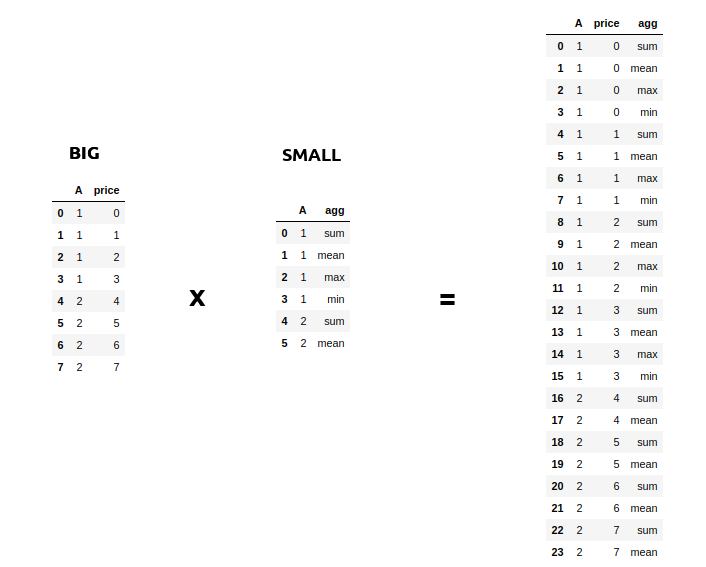

In [28]:
big = pd.DataFrame({'A':[1,1,1,1,2,2,2,2],'price': [i for i in range(8)]}) 

small = pd.DataFrame({'A':[1,1,1,1,2,2],'agg':['sum','mean','max','min','sum','mean']}) 

In [29]:
big

,A,price
0,1,0
1,1,1
2,1,2
3,1,3
4,2,4
5,2,5
6,2,6
7,2,7


In [30]:
small

,A,agg
0,1,sum
1,1,mean
2,1,max
3,1,min
4,2,sum
5,2,mean


In [31]:
big.merge(small,on = ['A'],how='left')

,A,price,agg
0,1,0,sum
1,1,0,mean
2,1,0,max
3,1,0,min
4,1,1,sum
5,1,1,mean
6,1,1,max
7,1,1,min
8,1,2,sum
9,1,2,mean


Such sort of operations is aplenty in Spark where you might want to apply multiple operations to a particular key. But assuming that the key data in the Big table is large, it will involve a lot of data movement. And sometimes so much that the application itself breaks. A small optimization then you can do when joining on such big tables(assuming the other table is small) is to broadcast the small table to each machine when you perform a join. You can do this easily using the broadcast keyword.

In [32]:
from pyspark.sql.functions import broadcast
cases = cases.join(broadcast(regions), ['province','city'],how='left')

In [33]:
cases

DataFrame[province: string, city: string, infection_case: string, confirmed: int, code: int, latitude: double, longitude: double, elementary_school_count: int, kindergarten_count: int, university_count: int, academy_ratio: double, elderly_population_ratio: double, elderly_alone_ratio: double, nursing_home_count: int, code: int, latitude: double, longitude: double, elementary_school_count: int, kindergarten_count: int, university_count: int, academy_ratio: double, elderly_population_ratio: double, elderly_alone_ratio: double, nursing_home_count: int]

# 3. Using SQL with Spark

In [34]:
# Reading Original Cases Back again
cases = spark.read.load("data/Case.csv",format="csv", sep=",", inferSchema="true", header="true")

In [35]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(spark)
sqlContext

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:79: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


We first register the cases dataframe to a temporary table cases_table on which we can run SQL operations.

In [36]:
cases.registerTempTable('cases_table')
newDF = sqlContext.sql('select * from cases_table where confirmed>100')

/usr/local/lib/python3.7/dist-packages/pyspark/sql/dataframe.py:140: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  FutureWarning


In [37]:
newDF.show()

+-------+-----------------+---------------+-----+--------------------+---------+---------+----------+
|case_id|         province|           city|group|      infection_case|confirmed| latitude| longitude|
+-------+-----------------+---------------+-----+--------------------+---------+---------+----------+
|1000010|            Seoul|              -|false|     overseas inflow|      321|        -|         -|
|1200001|            Daegu|         Nam-gu| true|  Shincheonji Church|     4510| 35.84008|  128.5667|
|1200002|            Daegu|   Dalseong-gun| true|Second Mi-Ju Hosp...|      196|35.857375|128.466651|
|1200003|            Daegu|         Seo-gu| true|Hansarang Convale...|      128|35.885592|128.556649|
|1200008|            Daegu|              -|false|contact with patient|      929|        -|         -|
|1200009|            Daegu|              -|false|                 etc|      724|        -|         -|
|2000007|      Gyeonggi-do|              -|false|     overseas inflow|      225|  

# 4. Create New Columns

There are many ways that you can use to create a column in a PySpark Dataframe. I will try to show the most usable of them.

Using Spark Native Functions
The most pysparkish way to create a new column in a PySpark DataFrame is by using built-in functions. This is the most performant programmatical way to create a new column, so this is the first place I go whenever I want to do some column manipulation.

We can use .withcolumn along with PySpark SQL functions to create a new column. In essence, you can find String functions, Date functions, and Math functions already implemented using Spark functions. Our first function, the F.col function gives us access to the column. So if we wanted to add 100 to a column, we could use F.col

## Using Spark Native Functions

In [38]:
casesWithNewConfirmed = cases.withColumn("NewConfirmed", 100 + F.col("confirmed"))
casesWithNewConfirmed.show()

+-------+--------+---------------+-----+--------------------+---------+---------+----------+------------+
|case_id|province|           city|group|      infection_case|confirmed| latitude| longitude|NewConfirmed|
+-------+--------+---------------+-----+--------------------+---------+---------+----------+------------+
|1000001|   Seoul|     Yongsan-gu| true|       Itaewon Clubs|       72|37.538621|126.992652|         172|
|1000002|   Seoul|        Guro-gu| true| Guro-gu Call Center|       98|37.508163|126.884387|         198|
|1000003|   Seoul|  Dongdaemun-gu| true|       Dongan Church|       20|37.592888|127.056766|         120|
|1000004|   Seoul|        Guro-gu| true|Manmin Central Ch...|       41|37.481059|126.894343|         141|
|1000005|   Seoul|   Eunpyeong-gu| true|Eunpyeong St. Mar...|       14| 37.63369|  126.9165|         114|
|1000006|   Seoul|   Seongdong-gu| true|    Seongdong-gu APT|       13| 37.55713|  127.0403|         113|
|1000007|   Seoul|      Jongno-gu| true|Jongno

In [39]:
casesWithExpConfirmed = cases.withColumn("ExpConfirmed", F.exp("confirmed"))
casesWithExpConfirmed.show()

+-------+--------+---------------+-----+--------------------+---------+---------+----------+--------------------+
|case_id|province|           city|group|      infection_case|confirmed| latitude| longitude|        ExpConfirmed|
+-------+--------+---------------+-----+--------------------+---------+---------+----------+--------------------+
|1000001|   Seoul|     Yongsan-gu| true|       Itaewon Clubs|       72|37.538621|126.992652|1.858671745284127...|
|1000002|   Seoul|        Guro-gu| true| Guro-gu Call Center|       98|37.508163|126.884387|3.637970947608805E42|
|1000003|   Seoul|  Dongdaemun-gu| true|       Dongan Church|       20|37.592888|127.056766| 4.851651954097903E8|
|1000004|   Seoul|        Guro-gu| true|Manmin Central Ch...|       41|37.481059|126.894343|6.398434935300549...|
|1000005|   Seoul|   Eunpyeong-gu| true|Eunpyeong St. Mar...|       14| 37.63369|  126.9165|  1202604.2841647768|
|1000006|   Seoul|   Seongdong-gu| true|    Seongdong-gu APT|       13| 37.55713|  127.0

## Spark UDFs

Sometimes we want to do complicated things to a column or multiple columns. This could be thought of as a map operation on a PySpark Dataframe to a single column or multiple columns. While Spark SQL functions do solve many use cases when it comes to column creation, we can use Spark UDF whenever we need more matured Python functionality.

To use Spark UDFs, we need to use the F.udf function to convert a regular python function to a Spark UDF. We also need to specify the return type of the function. In this example the return type is StringType()

In [40]:
import pyspark.sql.functions as F
from pyspark.sql.types import *
def casesHighLow(confirmed):
    if confirmed < 50: 
        return 'low'
    else:
        return 'high'
    
#convert to a UDF Function by passing in the function and return type of function
casesHighLowUDF = F.udf(casesHighLow, StringType())

CasesWithHighLow = cases.withColumn("HighLow", casesHighLowUDF("confirmed"))
CasesWithHighLow.show()

+-------+--------+---------------+-----+--------------------+---------+---------+----------+-------+
|case_id|province|           city|group|      infection_case|confirmed| latitude| longitude|HighLow|
+-------+--------+---------------+-----+--------------------+---------+---------+----------+-------+
|1000001|   Seoul|     Yongsan-gu| true|       Itaewon Clubs|       72|37.538621|126.992652|   high|
|1000002|   Seoul|        Guro-gu| true| Guro-gu Call Center|       98|37.508163|126.884387|   high|
|1000003|   Seoul|  Dongdaemun-gu| true|       Dongan Church|       20|37.592888|127.056766|    low|
|1000004|   Seoul|        Guro-gu| true|Manmin Central Ch...|       41|37.481059|126.894343|    low|
|1000005|   Seoul|   Eunpyeong-gu| true|Eunpyeong St. Mar...|       14| 37.63369|  126.9165|    low|
|1000006|   Seoul|   Seongdong-gu| true|    Seongdong-gu APT|       13| 37.55713|  127.0403|    low|
|1000007|   Seoul|      Jongno-gu| true|Jongno Community ...|       10| 37.57681|   127.006

## Using RDDs

In [41]:
import math
from pyspark.sql import Row
def rowwise_function(row):
    # convert row to python dictionary:
    row_dict = row.asDict()
    # Add a new key in the dictionary with the new column name and value.
    # This might be a big complex function.
    row_dict['expConfirmed'] = float(np.exp(row_dict['confirmed']))
    # convert dict to row back again:
    newrow = Row(**row_dict)
    # return new row
    return newrow

# convert cases dataframe to RDD
cases_rdd = cases.rdd

# apply our function to RDD
cases_rdd_new = cases_rdd.map(lambda row: rowwise_function(row))

# Convert RDD Back to DataFrame
casesNewDf = sqlContext.createDataFrame(cases_rdd_new)

casesNewDf.show()

+-------+--------+---------------+-----+--------------------+---------+---------+----------+--------------------+
|case_id|province|           city|group|      infection_case|confirmed| latitude| longitude|        expConfirmed|
+-------+--------+---------------+-----+--------------------+---------+---------+----------+--------------------+
|1000001|   Seoul|     Yongsan-gu| true|       Itaewon Clubs|       72|37.538621|126.992652|1.858671745284127...|
|1000002|   Seoul|        Guro-gu| true| Guro-gu Call Center|       98|37.508163|126.884387|3.637970947608805E42|
|1000003|   Seoul|  Dongdaemun-gu| true|       Dongan Church|       20|37.592888|127.056766| 4.851651954097903E8|
|1000004|   Seoul|        Guro-gu| true|Manmin Central Ch...|       41|37.481059|126.894343|6.398434935300549...|
|1000005|   Seoul|   Eunpyeong-gu| true|Eunpyeong St. Mar...|       14| 37.63369|  126.9165|  1202604.2841647768|
|1000006|   Seoul|   Seongdong-gu| true|    Seongdong-gu APT|       13| 37.55713|  127.0

## Pandas UDF

This functionality was introduced in the Spark version 2.3.1. And this allows us to use pandas functionality with Spark. We generally use it when we have to run a groupBy operation on a Spark dataframe or whenever we need to create rolling features and want to use Pandas rolling functions/window functions rather than Spark window functions.

The way we use it is by using the F.pandas_udf decorator. We assume here that the input to the function will be a pandas data frame. And we need to return a pandas dataframe in turn from this function.

The only complexity here is that we have to provide a schema for the output Dataframe. We can use the original schema of a dataframe to create the outSchema.

In [42]:
cases.printSchema()

root
 |-- case_id: integer (nullable = true)
 |-- province: string (nullable = true)
 |-- city: string (nullable = true)
 |-- group: boolean (nullable = true)
 |-- infection_case: string (nullable = true)
 |-- confirmed: integer (nullable = true)
 |-- latitude: string (nullable = true)
 |-- longitude: string (nullable = true)



Here we are  using Pandas UDF to get normalized confirmed cases grouped by infection_case. The main advantage here is that we get to work with pandas dataframes in Spark.

In [43]:
from pyspark.sql.types import IntegerType, StringType, DoubleType, BooleanType
from pyspark.sql.types import StructType, StructField

# Declare the schema for the output of our function

outSchema = StructType([StructField('case_id',IntegerType(),True),
                        StructField('province',StringType(),True),
                        StructField('city',StringType(),True),
                        StructField('group',BooleanType(),True),
                        StructField('infection_case',StringType(),True),
                        StructField('confirmed',IntegerType(),True),
                        StructField('latitude',StringType(),True),
                        StructField('longitude',StringType(),True),
                        StructField('normalized_confirmed',DoubleType(),True)
                       ])
# decorate our function with pandas_udf decorator
@F.pandas_udf(outSchema, F.PandasUDFType.GROUPED_MAP)
def subtract_mean(pdf):
    # pdf is a pandas.DataFrame
    v = pdf.confirmed
    v = v - v.mean()
    pdf['normalized_confirmed'] = v
    return pdf

confirmed_groupwise_normalization = cases.groupby("infection_case").apply(subtract_mean)

confirmed_groupwise_normalization.limit(10).toPandas()

/usr/local/lib/python3.7/dist-packages/pyspark/sql/pandas/group_ops.py:84: UserWarning: It is preferred to use 'applyInPandas' over this API. This API will be deprecated in the future releases. See SPARK-28264 for more details.
  "more details.", UserWarning)


,case_id,province,city,group,infection_case,confirmed,latitude,longitude,normalized_confirmed
0,6000003,Gyeongsangbuk-do,Bonghwa-gun,True,Bonghwa Pureun Nursing Home,68,36.92757,128.9099,0.0
1,2000005,Gyeonggi-do,Seongnam-si,True,Bundang Jesaeng Hospital,22,37.38833,127.1218,0.0
2,6100006,Gyeongsangnam-do,Changnyeong-gun,True,Changnyeong Coin Karaoke,7,35.54127,128.5008,0.0
3,1100006,Busan,from other city,True,Cheongdo Daenam Hospital,1,-,-,-40.0
4,1200006,Daegu,from other city,True,Cheongdo Daenam Hospital,2,-,-,-39.0
5,6000002,Gyeongsangbuk-do,Cheongdo-gun,True,Cheongdo Daenam Hospital,120,35.64887,128.7368,79.0
6,1200004,Daegu,Dalseong-gun,True,Daesil Convalescent Hospital,100,35.857393,128.466653,0.0
7,1000003,Seoul,Dongdaemun-gu,True,Dongan Church,20,37.592888,127.056766,0.0
8,1000005,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165,0.0
9,1200005,Daegu,Dong-gu,True,Fatima Hospital,37,35.88395,128.624059,0.0


# 5. Spark Window Functions

 Here we will see some of the most important window functions available in spark.

For this, we will also use one more data CSV, which has dates present as that will help with understanding Window functions much better. we will use the TimeProvince dataframe which contains daily case information for each province.

In [44]:
timeprovince = spark.read.load("data/TimeProvince.csv",format="csv", \
                        sep=",", inferSchema="true", header="true")
timeprovince.show()


+----------+----+-----------------+---------+--------+--------+
|      date|time|         province|confirmed|released|deceased|
+----------+----+-----------------+---------+--------+--------+
|2020-01-20|  16|            Seoul|        0|       0|       0|
|2020-01-20|  16|            Busan|        0|       0|       0|
|2020-01-20|  16|            Daegu|        0|       0|       0|
|2020-01-20|  16|          Incheon|        1|       0|       0|
|2020-01-20|  16|          Gwangju|        0|       0|       0|
|2020-01-20|  16|          Daejeon|        0|       0|       0|
|2020-01-20|  16|            Ulsan|        0|       0|       0|
|2020-01-20|  16|           Sejong|        0|       0|       0|
|2020-01-20|  16|      Gyeonggi-do|        0|       0|       0|
|2020-01-20|  16|       Gangwon-do|        0|       0|       0|
|2020-01-20|  16|Chungcheongbuk-do|        0|       0|       0|
|2020-01-20|  16|Chungcheongnam-do|        0|       0|       0|
|2020-01-20|  16|     Jeollabuk-do|     

# Ranking

We can get rank as well as dense_rank on a group using this function. For example, we may want to have a column in your cases table that provides the rank of infection_case based on the number of infection_case in a province. We can do this by:

In [45]:
from pyspark.sql.window import Window
windowSpec = Window().partitionBy(['province']).orderBy(F.desc('confirmed'))
cases.withColumn("rank",F.rank().over(windowSpec)).show()

+-------+-----------------+---------------+-----+--------------------+---------+---------+----------+----+
|case_id|         province|           city|group|      infection_case|confirmed| latitude| longitude|rank|
+-------+-----------------+---------------+-----+--------------------+---------+---------+----------+----+
|1100001|            Busan|     Dongnae-gu| true|       Onchun Church|       39| 35.21628|  129.0771|   1|
|1100009|            Busan|              -|false|                 etc|       29|        -|         -|   2|
|1100007|            Busan|              -|false|     overseas inflow|       25|        -|         -|   3|
|1100008|            Busan|              -|false|contact with patient|       18|        -|         -|   4|
|1100002|            Busan|from other city| true|  Shincheonji Church|       12|        -|         -|   5|
|1100004|            Busan|    Haeundae-gu| true|Haeundae-gu Catho...|        6| 35.20599|  129.1256|   6|
|1100003|            Busan|     Suyeo

# Lag 

Sometimes our data science models may need lag based features. For example, a model might have variables like the price last week or sales quantity the previous day. We can create such features using the lag function with window functions. Here we are trying to get the confirmed cases 7 days before. We are filtering to show the results as the first few days of corona cases were zeros. We can see here that the lag_7 day feature is shifted by 7 days.

In [46]:
from pyspark.sql.window import Window
windowSpec = Window().partitionBy(['province']).orderBy('date')
timeprovinceWithLag = timeprovince.withColumn("lag_7",F.lag("confirmed", 7).over(windowSpec))

timeprovinceWithLag.filter(timeprovinceWithLag.date>'2020-03-10').show()

+----------+----+--------+---------+--------+--------+-----+
|      date|time|province|confirmed|released|deceased|lag_7|
+----------+----+--------+---------+--------+--------+-----+
|2020-03-11|   0|   Busan|       98|      21|       0|   92|
|2020-03-12|   0|   Busan|       99|      29|       0|   92|
|2020-03-13|   0|   Busan|      100|      36|       0|   95|
|2020-03-14|   0|   Busan|      103|      40|       0|   96|
|2020-03-15|   0|   Busan|      106|      52|       1|   96|
|2020-03-16|   0|   Busan|      107|      53|       1|   96|
|2020-03-17|   0|   Busan|      107|      54|       1|   96|
|2020-03-18|   0|   Busan|      107|      58|       1|   98|
|2020-03-19|   0|   Busan|      107|      58|       1|   99|
|2020-03-20|   0|   Busan|      108|      60|       1|  100|
|2020-03-21|   0|   Busan|      108|      67|       1|  103|
|2020-03-22|   0|   Busan|      108|      69|       1|  106|
|2020-03-23|   0|   Busan|      109|      71|       1|  107|
|2020-03-24|   0|   Busa

# Rolling Aggregations

Sometimes it helps to provide rolling averages to our models. For example, we might want to have a rolling 7-day sales sum/mean as a feature for our sales regression model. Let us calculate the rolling mean of confirmed cases for the last 7 days here.

In [47]:
from pyspark.sql.window import Window

windowSpec = Window().partitionBy(['province']).orderBy('date').rowsBetween(-6,0)
timeprovinceWithRoll = timeprovince.withColumn("roll_7_confirmed",F.mean("confirmed").over(windowSpec))
timeprovinceWithRoll.filter(timeprovinceWithLag.date>'2020-03-10').show()

+----------+----+--------+---------+--------+--------+------------------+
|      date|time|province|confirmed|released|deceased|  roll_7_confirmed|
+----------+----+--------+---------+--------+--------+------------------+
|2020-03-11|   0|   Busan|       98|      21|       0| 95.57142857142857|
|2020-03-12|   0|   Busan|       99|      29|       0| 96.57142857142857|
|2020-03-13|   0|   Busan|      100|      36|       0| 97.28571428571429|
|2020-03-14|   0|   Busan|      103|      40|       0| 98.28571428571429|
|2020-03-15|   0|   Busan|      106|      52|       1| 99.71428571428571|
|2020-03-16|   0|   Busan|      107|      53|       1|101.28571428571429|
|2020-03-17|   0|   Busan|      107|      54|       1|102.85714285714286|
|2020-03-18|   0|   Busan|      107|      58|       1|104.14285714285714|
|2020-03-19|   0|   Busan|      107|      58|       1|105.28571428571429|
|2020-03-20|   0|   Busan|      108|      60|       1|106.42857142857143|
|2020-03-21|   0|   Busan|      108|  

## Running Totals

In [48]:
from pyspark.sql.window import Window

windowSpec = Window().partitionBy(['province']).orderBy('date').rowsBetween(Window.unboundedPreceding,Window.currentRow)
timeprovinceWithRoll = timeprovince.withColumn("cumulative_confirmed",F.sum("confirmed").over(windowSpec))
timeprovinceWithRoll.filter(timeprovinceWithLag.date>'2020-03-10').show()

+----------+----+--------+---------+--------+--------+--------------------+
|      date|time|province|confirmed|released|deceased|cumulative_confirmed|
+----------+----+--------+---------+--------+--------+--------------------+
|2020-03-11|   0|   Busan|       98|      21|       0|                1408|
|2020-03-12|   0|   Busan|       99|      29|       0|                1507|
|2020-03-13|   0|   Busan|      100|      36|       0|                1607|
|2020-03-14|   0|   Busan|      103|      40|       0|                1710|
|2020-03-15|   0|   Busan|      106|      52|       1|                1816|
|2020-03-16|   0|   Busan|      107|      53|       1|                1923|
|2020-03-17|   0|   Busan|      107|      54|       1|                2030|
|2020-03-18|   0|   Busan|      107|      58|       1|                2137|
|2020-03-19|   0|   Busan|      107|      58|       1|                2244|
|2020-03-20|   0|   Busan|      108|      60|       1|                2352|
|2020-03-21|

# 6. Pivot Dataframes

In [49]:
pivotedTimeprovince = timeprovince.groupBy('date').pivot('province') \
                      .agg(F.sum('confirmed').alias('confirmed') , F.sum('released').alias('released'))
pivotedTimeprovince.limit(10).toPandas()

,date,Busan_confirmed,Busan_released,Chungcheongbuk-do_confirmed,Chungcheongbuk-do_released,Chungcheongnam-do_confirmed,Chungcheongnam-do_released,Daegu_confirmed,Daegu_released,Daejeon_confirmed,...,Jeollabuk-do_confirmed,Jeollabuk-do_released,Jeollanam-do_confirmed,Jeollanam-do_released,Sejong_confirmed,Sejong_released,Seoul_confirmed,Seoul_released,Ulsan_confirmed,Ulsan_released
0,2020-04-13,126,103,45,31,139,109,6819,5395,39,...,17,8,15,6,46,22,610,214,41,33
1,2020-02-26,58,0,5,0,3,0,710,1,5,...,3,1,1,0,1,0,49,8,4,0
2,2020-04-12,126,103,45,29,139,108,6816,5356,39,...,17,8,15,5,46,22,602,202,41,32
3,2020-02-13,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,14,2,0,0
4,2020-04-20,132,115,45,38,141,122,6833,5769,39,...,17,9,15,8,46,29,624,304,43,34
5,2020-01-22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2020-05-14,144,127,55,43,144,138,6865,6349,43,...,20,14,17,13,47,46,711,564,45,41
7,2020-04-22,134,115,45,39,141,122,6836,5827,40,...,17,9,15,8,46,33,628,322,43,35
8,2020-05-13,144,126,52,43,143,138,6865,6322,43,...,20,14,16,12,47,46,707,558,45,41
9,2020-03-16,107,53,31,6,115,12,6066,734,22,...,7,4,4,2,40,0,253,52,28,7


# 7. Unpivot/Stack Dataframes

In [50]:
pivotedTimeprovince.columns  

['date',
 'Busan_confirmed',
 'Busan_released',
 'Chungcheongbuk-do_confirmed',
 'Chungcheongbuk-do_released',
 'Chungcheongnam-do_confirmed',
 'Chungcheongnam-do_released',
 'Daegu_confirmed',
 'Daegu_released',
 'Daejeon_confirmed',
 'Daejeon_released',
 'Gangwon-do_confirmed',
 'Gangwon-do_released',
 'Gwangju_confirmed',
 'Gwangju_released',
 'Gyeonggi-do_confirmed',
 'Gyeonggi-do_released',
 'Gyeongsangbuk-do_confirmed',
 'Gyeongsangbuk-do_released',
 'Gyeongsangnam-do_confirmed',
 'Gyeongsangnam-do_released',
 'Incheon_confirmed',
 'Incheon_released',
 'Jeju-do_confirmed',
 'Jeju-do_released',
 'Jeollabuk-do_confirmed',
 'Jeollabuk-do_released',
 'Jeollanam-do_confirmed',
 'Jeollanam-do_released',
 'Sejong_confirmed',
 'Sejong_released',
 'Seoul_confirmed',
 'Seoul_released',
 'Ulsan_confirmed',
 'Ulsan_released']

In [51]:
newColnames = [x.replace("-","_") for x in pivotedTimeprovince.columns]

In [52]:
pivotedTimeprovince = pivotedTimeprovince.toDF(*newColnames)

In [53]:
expression = ""
cnt=0
for column in pivotedTimeprovince.columns:
    if column!='date':
        cnt +=1
        expression += f"'{column}' , {column},"
        
expression = f"stack({cnt}, {expression[:-1]}) as (Type,Value)"

In [54]:
unpivotedTimeprovince = pivotedTimeprovince.select('date',F.expr(expression))
unpivotedTimeprovince.show()

+----------+--------------------+-----+
|      date|                Type|Value|
+----------+--------------------+-----+
|2020-04-13|     Busan_confirmed|  126|
|2020-04-13|      Busan_released|  103|
|2020-04-13|Chungcheongbuk_do...|   45|
|2020-04-13|Chungcheongbuk_do...|   31|
|2020-04-13|Chungcheongnam_do...|  139|
|2020-04-13|Chungcheongnam_do...|  109|
|2020-04-13|     Daegu_confirmed| 6819|
|2020-04-13|      Daegu_released| 5395|
|2020-04-13|   Daejeon_confirmed|   39|
|2020-04-13|    Daejeon_released|   23|
|2020-04-13|Gangwon_do_confirmed|   49|
|2020-04-13| Gangwon_do_released|   28|
|2020-04-13|   Gwangju_confirmed|   27|
|2020-04-13|    Gwangju_released|   19|
|2020-04-13|Gyeonggi_do_confi...|  631|
|2020-04-13|Gyeonggi_do_released|  305|
|2020-04-13|Gyeongsangbuk_do_...| 1337|
|2020-04-13|Gyeongsangbuk_do_...| 1020|
|2020-04-13|Gyeongsangnam_do_...|  115|
|2020-04-13|Gyeongsangnam_do_...|   84|
+----------+--------------------+-----+
only showing top 20 rows



# 8. Salting

Sometimes it might happen that a lot of data goes to a single executor since the same key is assigned for a lot of rows in our data. Salting is another way that helps you to manage data skewness.

So assuming we want to do the sum operation when we have skewed keys. We can start by creating the Salted Key and then doing a double aggregation on that key as the sum of a sum still equals sum. To understand this assume we need the sum of confirmed infection_cases on the cases table and assume that the key infection_cases is skewed. We can do the required operation in two steps.

1. Create a Salting Key

We first create a salting key using a concatenation of infection_case column and a random_number between 0 to 9. In case your key is even more skewed, you can split it in even more than 10 parts.

In [55]:
cases = cases.withColumn("salt_key", F.concat(F.col("infection_case"), F.lit("_"), F.monotonically_increasing_id() % 10))

In [56]:
cases.show()

+-------+--------+---------------+-----+--------------------+---------+---------+----------+--------------------+
|case_id|province|           city|group|      infection_case|confirmed| latitude| longitude|            salt_key|
+-------+--------+---------------+-----+--------------------+---------+---------+----------+--------------------+
|1000001|   Seoul|     Yongsan-gu| true|       Itaewon Clubs|       72|37.538621|126.992652|     Itaewon Clubs_0|
|1000002|   Seoul|        Guro-gu| true| Guro-gu Call Center|       98|37.508163|126.884387|Guro-gu Call Cent...|
|1000003|   Seoul|  Dongdaemun-gu| true|       Dongan Church|       20|37.592888|127.056766|     Dongan Church_2|
|1000004|   Seoul|        Guro-gu| true|Manmin Central Ch...|       41|37.481059|126.894343|Manmin Central Ch...|
|1000005|   Seoul|   Eunpyeong-gu| true|Eunpyeong St. Mar...|       14| 37.63369|  126.9165|Eunpyeong St. Mar...|
|1000006|   Seoul|   Seongdong-gu| true|    Seongdong-gu APT|       13| 37.55713|  127.0

2. First Groupby on salt key

In [57]:
cases_temp = cases.groupBy(["infection_case","salt_key"]).agg(F.sum("confirmed").alias("salt_confirmed"))
cases_temp.show()

+--------------------+--------------------+--------------+
|      infection_case|            salt_key|salt_confirmed|
+--------------------+--------------------+--------------+
|       Onchun Church|     Onchun Church_2|            39|
|Bundang Jesaeng H...|Bundang Jesaeng H...|            22|
|Cheongdo Daenam H...|Cheongdo Daenam H...|             1|
|Seosan-si Laboratory|Seosan-si Laborat...|             9|
|Bonghwa Pureun Nu...|Bonghwa Pureun Nu...|            68|
|Seosan-si Laboratory|Seosan-si Laborat...|             2|
|       Onchun Church|     Onchun Church_7|             2|
| Guro-gu Call Center|Guro-gu Call Cent...|            48|
|Goesan-gun Jangye...|Goesan-gun Jangye...|            11|
|gym facility in C...|gym facility in C...|           103|
|contact with patient|contact with pati...|            58|
|contact with patient|contact with pati...|           929|
|Geochang-gun Woon...|Geochang-gun Woon...|             8|
|Cheongdo Daenam H...|Cheongdo Daenam H...|           12

3. Second Group On the original Key

In [58]:
cases_answer = cases_temp.groupBy(["infection_case"]).agg(F.sum("salt_confirmed").alias("final_confirmed"))
cases_answer.show()

+--------------------+---------------+
|      infection_case|final_confirmed|
+--------------------+---------------+
|Eunpyeong St. Mar...|             14|
|Ministry of Ocean...|             30|
|Bundang Jesaeng H...|             22|
|       Milal Shelter|             36|
|       Itaewon Clubs|             81|
| Wonju-si Apartments|              3|
|       Dongan Church|             20|
|     overseas inflow|            777|
|Gyeongsan Cham Jo...|             16|
|Hansarang Convale...|            128|
|Second Mi-Ju Hosp...|            196|
|Gyeongsan Seorin ...|             66|
|Changnyeong Coin ...|              7|
|      Jin-gu Academy|              4|
|Korea Forest Engi...|              3|
|Goesan-gun Jangye...|             11|
|         Wings Tower|             10|
|     Geochang Church|             10|
|     Fatima Hospital|             37|
|Bonghwa Pureun Nu...|             68|
+--------------------+---------------+
only showing top 20 rows

